# Домашнє завдання

## Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету `fasion_mnist`.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету `fasion_mnist`. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

## Частина 2
В цій частині ми знову будемо працювати з датасетом `fasion_mnist`.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує `VGG16` в якості згорткової основи.

Навчіть отриману мережу на даних із датасету `fasion_mnist`. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте __прийоми донавчання__ та __виділення ознак__.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

## Imports

In [1]:
import random
import numpy as np

from keras.datasets import fashion_mnist

from keras.models import Sequential
from skimage.color import gray2rgb

from keras.layers import (
  Conv2D,
  MaxPooling2D,
  Flatten,
  Dense
)

from keras.applications import VGG16
from keras.preprocessing.image import (
  img_to_array,
  array_to_img,
  ImageDataGenerator
)

from sklearn.metrics import (
  classification_report,
  confusion_matrix,
  ConfusionMatrixDisplay,
)

import matplotlib.pyplot as plt
%matplotlib inline

## Load DataSet

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_names = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

### Normalization

In [3]:
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32') / 255

### Visualization

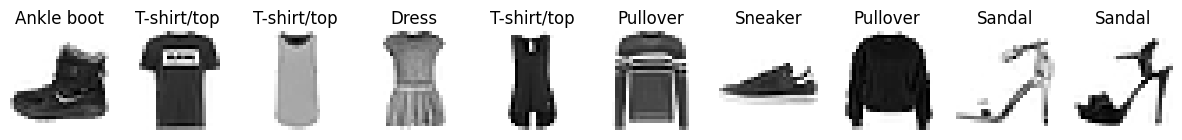

In [4]:
num_images = 10

plt.figure(figsize=(15, 5))
for i in range(num_images):
  plt.subplot(1, num_images, i + 1)
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]])
  plt.axis('off')
plt.show()

## Task 1. Model with Conv2D

### Creating model

In [5]:
conv2d_model = Sequential([
  Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
  Conv2D(64, (3, 3), activation="relu"),
  MaxPooling2D((2, 2)),

  Conv2D(128, (3, 3), activation="relu"),
  Conv2D(128, (3, 3), activation="relu"),
  MaxPooling2D((2, 2)),

  Conv2D(256, (3, 3), activation="relu"),
  MaxPooling2D((2, 2)),

  Flatten(),

  Dense(256, activation="relu"),
  Dense(10, activation="softmax")
])

In [6]:
conv2d_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                   

### Compile model

In [7]:
conv2d_model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

### Model training

In [8]:
conv2d_history = conv2d_model.fit(
  x = train_data,
  y = train_labels,
  batch_size = 64,
  epochs = 16,
  validation_data = (test_data, test_labels),
  verbose=0
)

### Model evaluation

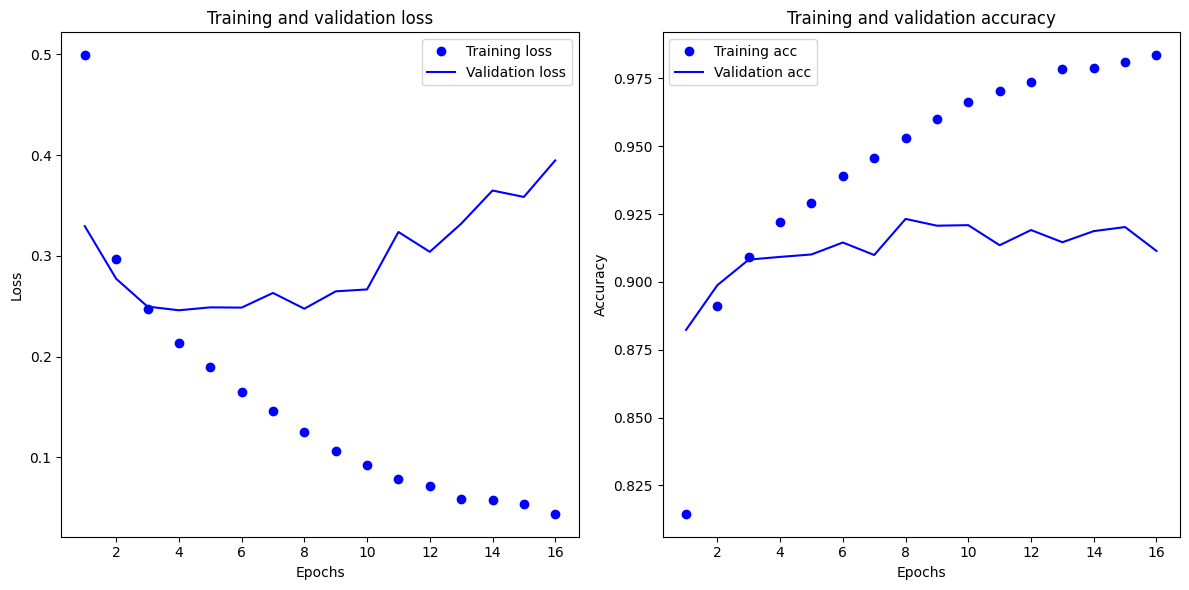

In [9]:
history_conv2d = conv2d_history.history

epochs = range(1, len(history_conv2d['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Виведення графіка функції втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, history_conv2d['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_conv2d['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Виведення графіка точності
plt.subplot(1, 2, 2)
plt.plot(epochs, history_conv2d['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_conv2d['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = conv2d_model.evaluate(test_data,  test_labels, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%\nTest loss: {np.round(test_loss, 2)}')

Test accuracy: 91.14%
Test loss: 0.39


### Results

#### Classification report

In [11]:
predictions = conv2d_model.predict(test_data, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_classes, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.83      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.83      0.86      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.90      0.82      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.67      0.84      0.75      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.95      0.99      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



#### Confusion Matrix

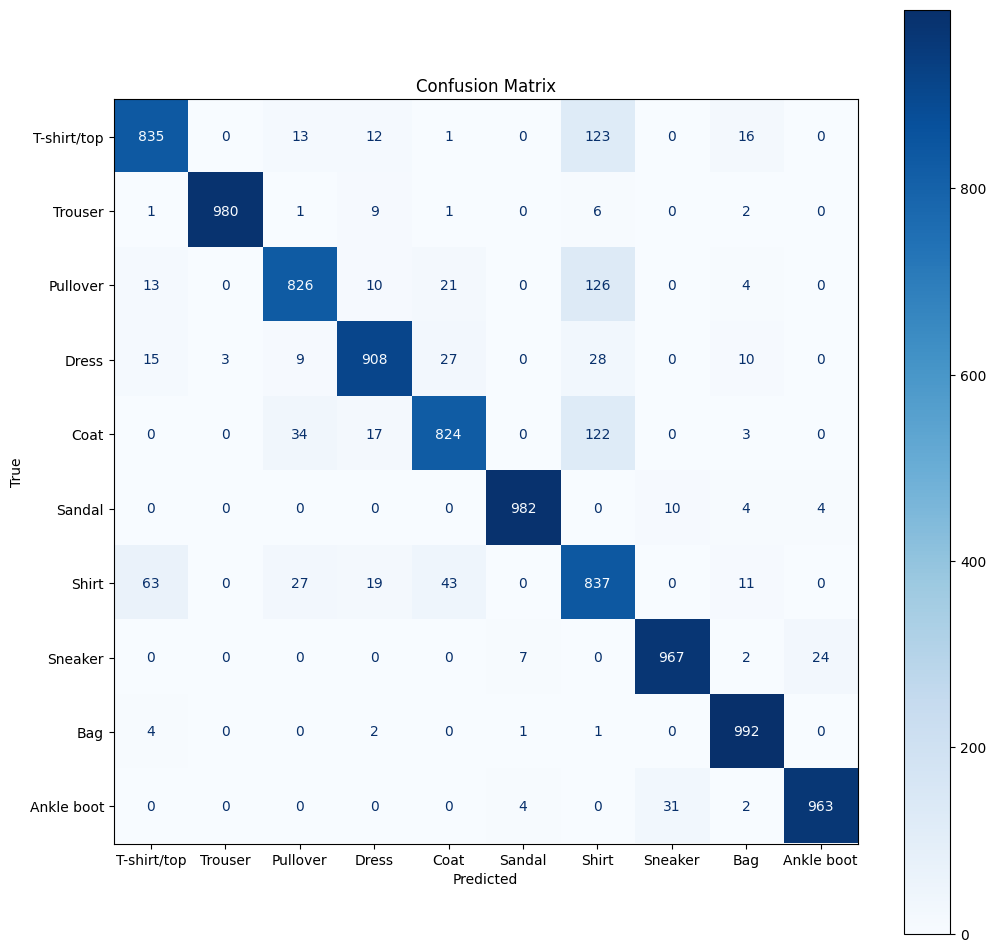

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(test_labels, predicted_classes, labels=range(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Test with images

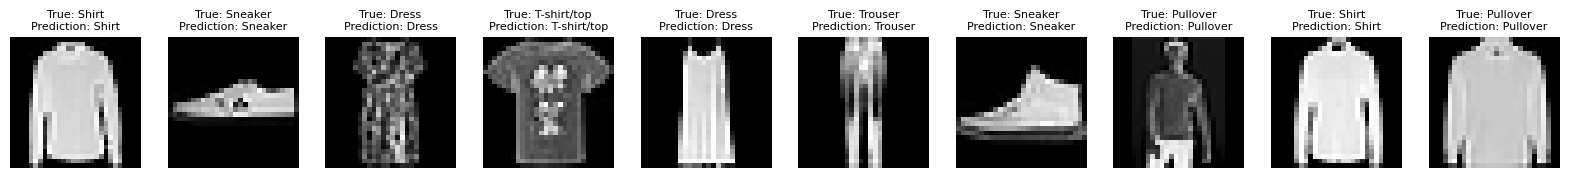

Accuracy with 10 images: 100.00%


In [13]:
random_indices = random.sample(range(len(test_data)), 10)
images = test_data[random_indices]
labels = test_labels[random_indices]

predictions = conv2d_model.predict(images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].reshape((28, 28)), cmap='gray')
    plt.title(f"True: {class_names[labels[i]]}\nPrediction: {class_names[predicted_labels[i]]}", fontsize = 8)
    plt.axis('off')

plt.show()

correct_predictions = (predicted_labels == labels)
accuracy = sum(correct_predictions) / len(correct_predictions)
print(f"Accuracy with 10 images: {accuracy * 100:.2f}%")

## Task 2. Model with VGG16

### Data prepare

In [14]:
# Змінюємо розмір зображень на 48x48 (розмір вхідного зображення для VGG16)
train_data_resized = np.array([img_to_array(array_to_img(img).resize((48, 48))) for img in train_data])
test_data_resized = np.array([img_to_array(array_to_img(img).resize((48, 48))) for img in test_data])

In [15]:
# Розширення до 3 каналів (RGB)
train_data_rgb = np.array([gray2rgb(img.squeeze()) for img in train_data_resized])
test_data_rgb = np.array([gray2rgb(img.squeeze()) for img in test_data_resized])

In [16]:
train_data_rgb.shape, test_data_rgb.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

### Define base model

In [17]:
# Завантаження переднього кінця (features extractor) моделі VGG16 без останнього повнозв'язного шару
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [18]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### Define Datagen

In [19]:
# Створення генераторів для аугментації даних
datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True,
  fill_mode='nearest'
)

train_generator = datagen.flow(
  train_data_rgb,
  train_labels,
  batch_size=20,
)

validation_generator = datagen.flow(
  test_data_rgb,
  test_labels,
  batch_size=20,
)

### Creating model

In [20]:
# "Заморожуємо" ваги згорткових шарів VGG16
vgg16_base.trainable = False

In [21]:
vgg16_model = Sequential([
  vgg16_base,
  Flatten(),
  Dense(512, activation="relu"),
  Dense(10, activation="softmax"),
])

In [22]:
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 267786 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### Compile model

In [23]:
vgg16_model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

### Model training

In [24]:
vgg16_history = vgg16_model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=0
)

### Fine-tuning

#### Creating fine-tuning model

In [30]:
# Розморожуємо кілька верхніх шарів для донавчання
vgg16_base.trainable = True

for layer in vgg16_base.layers[:-2]:
  layer.trainable = False

vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [31]:
ft_model = Sequential()
ft_model.add(vgg16_base)

for layer in vgg16_model.layers[1:]:
  ft_model.add(layer)

In [32]:
ft_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 2627594 (10.02 MB)
Non-trainable params: 12354880 (47.13 MB)
_________________________________________________________________


#### Compile fine-tuning model

In [33]:
ft_model.compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy']
)

#### Train fine-tuning model

In [34]:
ft_model_history = ft_model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=0
)

### Model evaluation

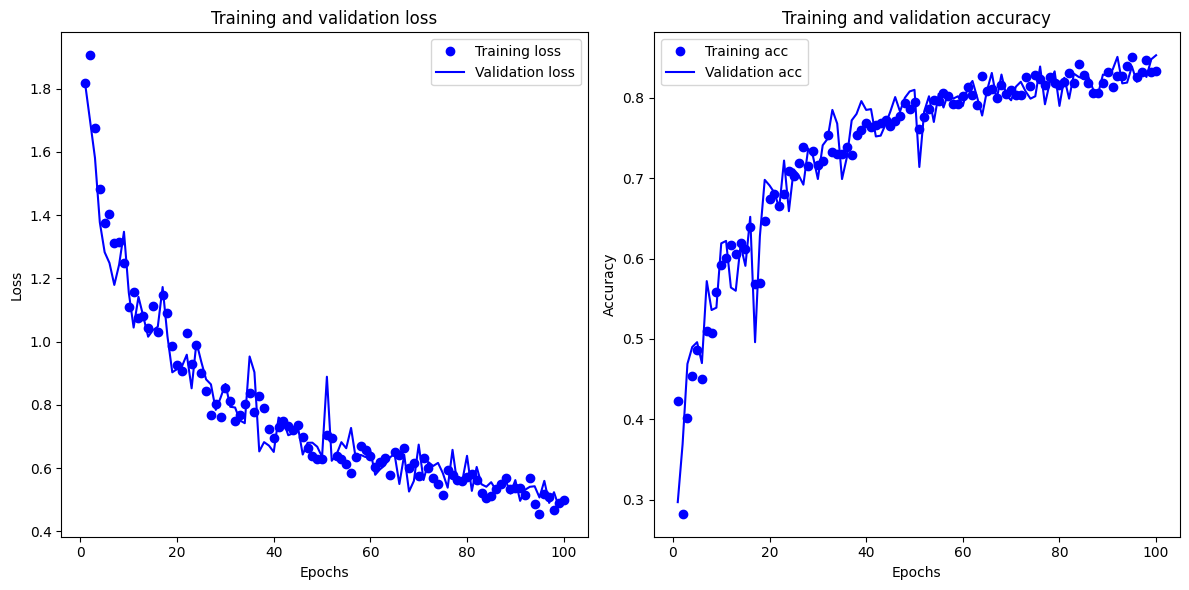

In [35]:
history_ft_model = ft_model_history.history

epochs = range(1, len(history_ft_model['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Виведення графіка функції втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, history_ft_model['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_ft_model['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Виведення графіка точності
plt.subplot(1, 2, 2)
plt.plot(epochs, history_ft_model['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_ft_model['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
test_loss, test_acc = ft_model.evaluate(test_data_rgb, test_labels, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%\nTest loss: {np.round(test_loss, 2)}')

Test accuracy: 84.71%
Test loss: 0.48


### Results

#### Classification report

In [37]:
predictions = ft_model.predict(test_data_rgb, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_classes, target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.85      0.80      1000
     Trouser       1.00      0.94      0.97      1000
    Pullover       0.91      0.69      0.79      1000
       Dress       0.86      0.83      0.84      1000
        Coat       0.72      0.80      0.75      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.52      0.59      0.55      1000
     Sneaker       0.89      0.95      0.92      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



#### Confusion Matrix

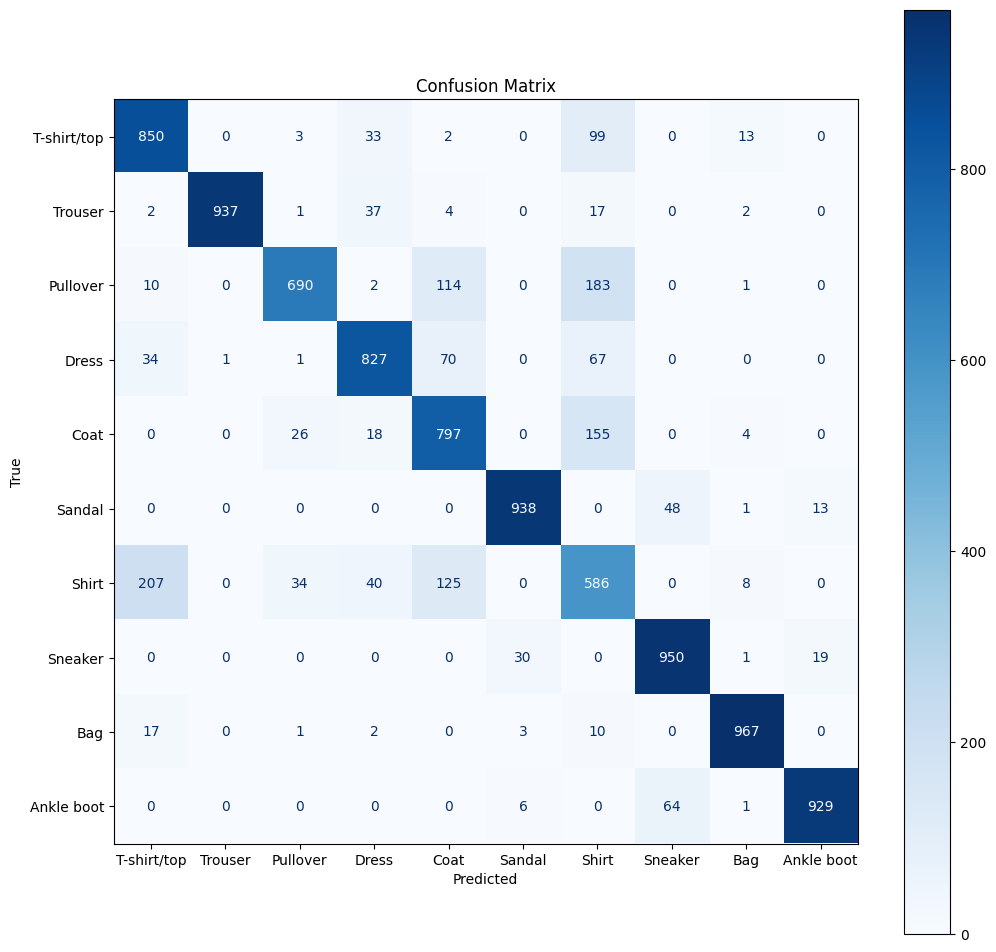

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))
cm = confusion_matrix(test_labels, predicted_classes, labels=range(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Test with images

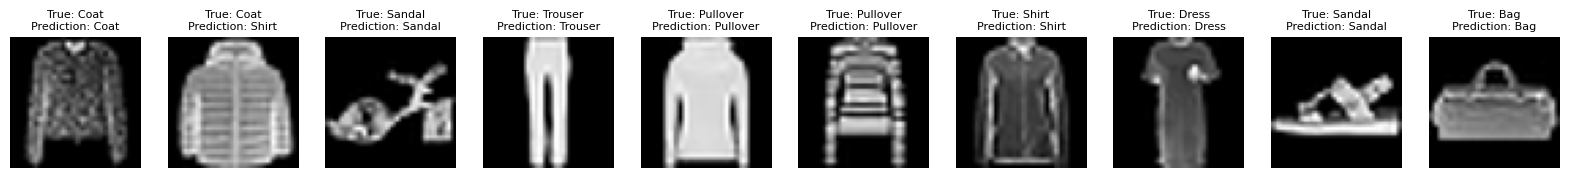

Accuracy with 10 images: 90.00%


In [39]:
random_indices = random.sample(range(len(test_data_rgb)), 10)
images = test_data_rgb[random_indices]
labels = test_labels[random_indices]

predictions = ft_model.predict(images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].reshape((48, 48, 3)).astype('uint8'), cmap='gray')
    plt.title(f"True: {class_names[labels[i]]}\nPrediction: {class_names[predicted_labels[i]]}", fontsize = 8)
    plt.axis('off')

plt.show()

correct_predictions = (predicted_labels == labels)
accuracy = sum(correct_predictions) / len(correct_predictions)
print(f"Accuracy with 10 images: {accuracy * 100:.2f}%")

# Висновки

У порівнянні з багатошаровою нейронною мережею, згорткова, що включає шари   __Conv2D__ та __MaxPooling2D__ дає більшу точність за набагато меншого розміру самої моделі.